# 1. Database preparation

## 1.1. Import data

In [19]:
import psycopg2

conn = psycopg2.connect(
    host="localhost",
    database="covid19",
    user="covid19",
    password="aluno")

# Open a cursor to perform database operations
cur = conn.cursor()

# Execute a query
cur.execute("select * from agrega_bd")

# Retrieve query results
records = cur.fetchall()
records

[('BDA95D6610B94CD8A7F2952E07B59342',
  'M',
  82.0,
  'BR',
  'SP',
  'MMMM',
  'Sirio Libanes',
  'Anti-HCV',
  'não reagente'),
 ('BDA95D6610B94CD8A7F2952E07B59342',
  'M',
  82.0,
  'BR',
  'SP',
  'MMMM',
  'Sirio Libanes',
  'Volume plaquetário médio',
  '11,8'),
 ('BDA95D6610B94CD8A7F2952E07B59342',
  'M',
  82.0,
  'BR',
  'SP',
  'MMMM',
  'Sirio Libanes',
  'Reticulócitos %',
  '1,20'),
 ('BDA95D6610B94CD8A7F2952E07B59342',
  'M',
  82.0,
  'BR',
  'SP',
  'MMMM',
  'Sirio Libanes',
  'C. Cetônicos, urina',
  'negativa'),
 ('BDA95D6610B94CD8A7F2952E07B59342',
  'M',
  82.0,
  'BR',
  'SP',
  'MMMM',
  'Sirio Libanes',
  'Urobilinogênio, urina',
  'inferior a 1,0 mg/dL'),
 ('BDA95D6610B94CD8A7F2952E07B59342',
  'M',
  82.0,
  'BR',
  'SP',
  'MMMM',
  'Sirio Libanes',
  'Células Epiteliais, urina',
  'raríssimas'),
 ('BDA95D6610B94CD8A7F2952E07B59342',
  'M',
  82.0,
  'BR',
  'SP',
  'MMMM',
  'Sirio Libanes',
  'DHL',
  '531'),
 ('BDA95D6610B94CD8A7F2952E07B59342',
  'M',
  

## 1.2. Prepare dataframe

In [20]:
import pandas as pd

df = pd.DataFrame(records, columns=["id_paciente", "ic_sexo", "idade", "cd_pais", "cd_uf", "cd_municipio", "de_hospital", "de_analito", "de_resultado"])

df_piv = pd.pivot_table(df, index=["id_paciente", "ic_sexo", "idade", "cd_pais", "cd_uf", "cd_municipio", "de_hospital"], columns=["de_analito"], values=["de_resultado"] , aggfunc='first')

df_final = pd.DataFrame(df_piv.to_records())

df_final.columns = [hdr.replace("(", "") \
                     for hdr in df_final.columns]
df_final.columns = [hdr.replace(")", "") \
                     for hdr in df_final.columns]
df_final.columns = [hdr.replace("'de_resultado', '", "") \
                     for hdr in df_final.columns]
df_final.columns = [hdr.replace("'", "") \
                     for hdr in df_final.columns]

# y = df_final.loc[:, 'test_covid']
# x = df_final.pop("test_covid")


# df
# df[df['de_analito'] == 'test_covid']
df_final


,id_paciente,ic_sexo,idade,cd_pais,cd_uf,cd_municipio,de_hospital,17-Alfa-Hidroxiprog.,183,25OH-Vitamina D Total,...,pO2 arterial,pO2 venoso,test_covid,v.Willebrand,Ácid Vanil-Mandélico,Ácido Valpróico,"Ácido ascorbico, plasma",Ácido fólico,Ácido Úrico,Índice de Green & King
0,003F1F4C194763E4A00FD809AF5FA6AA,M,64.0,BR,SP,MMMM,Sirio Libanes,NaN,NaN,NaN,...,NaN,NaN,DETECTADO,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,004372C1AFDA409721664680D566584C,M,30.0,BR,SP,SAO PAULO,Sirio Libanes,NaN,NaN,NaN,...,NaN,NaN,DETECTADO,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,007D8341B5ACFE2638807598AD434475,M,50.0,BR,UU,MMMM,Sirio Libanes,NaN,NaN,NaN,...,NaN,NaN,DETECTADO (POSITIVO),NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,008F7C768687F4DCE9792FF0BAE0F003,F,31.0,BR,SP,SAO PAULO,Sirio Libanes,NaN,NaN,NaN,...,NaN,NaN,DETECTADO (POSITIVO),NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0098C8322E8D107EA05D9213EDBFACED,M,27.0,BR,SP,MMMM,Sirio Libanes,NaN,NaN,NaN,...,NaN,NaN,DETECTADO,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2981,FFADAAB51D84E2D58387DFB5876B43E2,F,28.0,BR,SP,SAO PAULO,Sirio Libanes,NaN,NaN,NaN,...,NaN,NaN,DETECTADO (POSITIVO),NaN,NaN,NaN,NaN,NaN,NaN,NaN
2982,FFC81F516A0F4B0EB0EB5A1B444BD467,F,40.0,XX,UU,SAO PAULO,Sirio Libanes,NaN,NaN,NaN,...,NaN,NaN,DETECTADO,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2983,FFE3509C7443598B1C44FEC8C536B52B,M,47.0,BR,SP,SAO PAULO,Sirio Libanes,NaN,NaN,NaN,...,NaN,NaN,DETECTADO,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2984,FFEC3898BAA04751EB00C108270B8F7E,M,38.0,BR,DF,BRASILIA,Sirio Libanes,NaN,NaN,NaN,...,NaN,NaN,DETECTADO (POSITIVO),NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1.2.1. Remove non expressive categories

In [3]:
from copy import deepcopy

df_temp_full = deepcopy(df_final)

df_final = df_final[df_final.test_covid != 'INDETECTÁVEL']
df_final = df_final[df_final.test_covid != 'DETECTÁVEL']
df_final = df_final[df_final.test_covid != 'INCONCLUSIVO']
df_final = df_final[df_final.test_covid != 'Inconclusivo ']
# df_final = df_final[df_final.columns != 'id_paciente']
df_final = df_final.loc[:, df_final.columns != 'id_paciente']
# y_true.unique()

### 1.2.2. Preparing categorical data

In [4]:
from copy import deepcopy

df_temp = deepcopy(df_final)

categorical_columns = df_final.select_dtypes('object').columns

for col in categorical_columns:
    df_final[col] = pd.Categorical(df_final[col]).codes

df_final

,ic_sexo,idade,cd_pais,cd_uf,cd_municipio,de_hospital,17-Alfa-Hidroxiprog.,183,25OH-Vitamina D Total,ACTH,...,pO2 arterial,pO2 venoso,test_covid,v.Willebrand,Ácid Vanil-Mandélico,Ácido Valpróico,"Ácido ascorbico, plasma",Ácido fólico,Ácido Úrico,Índice de Green & King
0,1,64.0,0,12,3,0,-1,-1,-1,-1,...,-1,-1,0,-1,-1,-1,-1,-1,-1,-1
1,1,30.0,0,12,4,0,-1,-1,-1,-1,...,-1,-1,0,-1,-1,-1,-1,-1,-1,-1
2,1,50.0,0,13,3,0,-1,-1,-1,-1,...,-1,-1,1,-1,-1,-1,-1,-1,-1,-1
3,0,31.0,0,12,4,0,-1,-1,-1,-1,...,-1,-1,1,-1,-1,-1,-1,-1,-1,-1
4,1,27.0,0,12,3,0,-1,-1,-1,-1,...,-1,-1,0,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2981,0,28.0,0,12,4,0,-1,-1,-1,-1,...,-1,-1,1,-1,-1,-1,-1,-1,-1,-1
2982,0,40.0,1,13,4,0,-1,-1,-1,-1,...,-1,-1,0,-1,-1,-1,-1,-1,-1,-1
2983,1,47.0,0,12,4,0,-1,-1,-1,-1,...,-1,-1,0,-1,-1,-1,-1,-1,-1,-1
2984,1,38.0,0,2,0,0,-1,-1,-1,-1,...,-1,-1,1,-1,-1,-1,-1,-1,-1,-1


In [5]:
from copy import copy
new_df = copy(df_final)

y = new_df.loc[:, 'test_covid'].values.reshape(-1, 1)
x = new_df.loc[:, df_final.columns != 'test_covid']



In [6]:
import numpy as np

y_true = df_temp.loc[:, 'test_covid']
y_code = new_df.loc[:, 'test_covid']


classes_temp = [y_code.values.tolist(), y_true.values.tolist()]

classes = np.unique(np.array(classes_temp).T, axis=0).T

classes

array([['0', '1', '2', '3'],
       ['DETECTADO', 'DETECTADO (POSITIVO)', 'NÃO DETECTADO',
        'NÃO DETECTADO (NEGATIVO)']], dtype='<U24')

# 2. Exploratory analysis

## 2.1. Shape of the classes

[1322 1375   55    4    4    1  119  106]


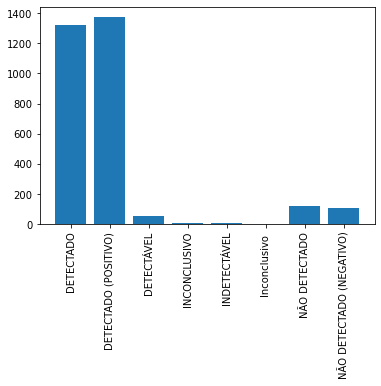

In [7]:
import matplotlib.pyplot as plt

y_true_full = df_temp_full.loc[:, 'test_covid']

labels, counts = np.unique(y_true_full, return_counts=True)

print(counts)

plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.xticks(rotation = 90) 
plt.show()

[1322 1375  119  106]


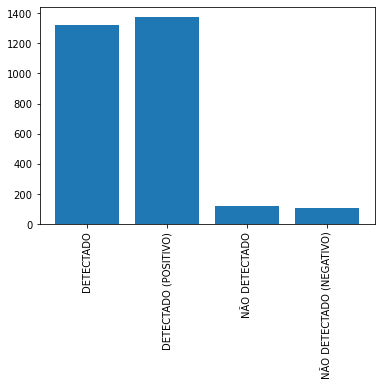

In [8]:
import matplotlib.pyplot as plt
labels, counts = np.unique(y_true, return_counts=True)

print(counts)

plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.xticks(rotation = 90) 
plt.show()

In [9]:
from pandas.core.algorithms import value_counts
from scipy.stats import entropy

entropies = []
for col in new_df.columns:

    counts = df_final[col].value_counts()
    entropies.append(entropy(counts))


entropies

[0.6927139997578466,
 3.9824882673939377,
 0.15480050576913845,
 0.8226261406126273,
 0.8369609312757653,
 0.0,
 0.006146256867114289,
 0.5979035482807361,
 0.4126442707673277,
 0.024582213322106937,
 1.6718705750443499,
 0.01568336331508737,
 0.025577656441008508,
 1.5171384281614513,
 0.003073187014754522,
 0.003073187014754522,
 0.003073187014754522,
 0.003073187014754522,
 0.06490526519256704,
 0.1117888801856187,
 0.003073187014754522,
 0.003073187014754522,
 0.003073187014754522,
 0.003073187014754522,
 0.003073187014754522,
 0.003073187014754522,
 0.003073187014754522,
 0.003073187014754522,
 0.003073187014754522,
 0.003073187014754522,
 0.35241798662411844,
 0.08586193169255654,
 0.01536476304844649,
 0.012292044924125634,
 0.003073187014754522,
 0.06119123595745102,
 0.003073187014754522,
 0.030726593019107778,
 0.012292044924125634,
 0.04253950840741552,
 0.05482497420506985,
 0.01568336331508737,
 0.021509847287685187,
 0.01684818710856568,
 0.003073187014754522,
 0.10481420

In [21]:
entrop = dict(zip(new_df.columns, entropies)) 
entrop

{'idade': 0.6927139997578466,
 'Leucócitos': 3.9824882673939377,
 'Neutrófilos': 0.15480050576913845,
 'Neutrófilos %': 0.8226261406126273,
 'Linfócitos %': 0.8369609312757653,
 'Plaquetas': 0.0,
 'Linfócitos': 0.006146256867114289,
 'Eritrócitos': 0.5979035482807361,
 'Hematócrito': 0.4126442707673277,
 'VCM': 0.024582213322106937,
 'Monócitos %': 1.6718705750443499,
 'Monócitos': 0.01568336331508737,
 'Proteína C-Reativa': 0.025577656441008508,
 'Hemoglobina': 1.5171384281614513,
 'HCM': 0.003073187014754522,
 'Eosinófilos %': 0.003073187014754522,
 'Creatinina': 0.003073187014754522,
 'CHCM': 0.003073187014754522,
 'RDW': 0.06490526519256704,
 'Volume plaquetário médio': 0.1117888801856187,
 'Eosinófilos': 0.003073187014754522,
 'Dimeros D, quant': 0.003073187014754522,
 'Uréia': 0.003073187014754522,
 'ALT TGP': 0.003073187014754522,
 'DHL': 0.003073187014754522,
 'AST TGO': 0.003073187014754522,
 'Basófilos %': 0.003073187014754522,
 'Basófilos': 0.003073187014754522,
 'Potássio':

In [11]:
import operator

sorted_x = sorted(entrop.items(), key=operator.itemgetter(1), reverse=True)

first_ten = sorted_x[:300]
columns_use = np.array(first_ten).T[0]

y = new_df.loc[:, 'test_covid'].values.reshape(-1, 1)
new_df = new_df[columns_use]
x = new_df.loc[:, new_df.columns != 'test_covid']

# 3. Decision tree classifier

## 3.1. With entropy

In [12]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

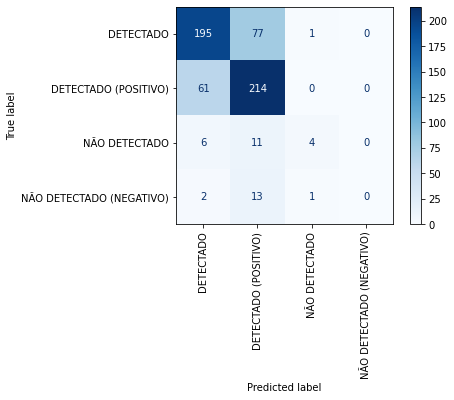

In [13]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

disp = plot_confusion_matrix(clf, x_test, y_test,
                                 display_labels=classes[1],
                                 cmap=plt.cm.Blues,
                                 xticks_rotation='vertical')
plt.show()


In [14]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=classes[1]))


Accuracy: 0.71

Micro Precision: 0.71
Micro Recall: 0.71
Micro F1-score: 0.71

Macro Precision: 0.52
Macro Recall: 0.42
Macro F1-score: 0.44

Weighted Precision: 0.69
Weighted Recall: 0.71
Weighted F1-score: 0.69

Classification Report

                          precision    recall  f1-score   support

               DETECTADO       0.74      0.71      0.73       273
    DETECTADO (POSITIVO)       0.68      0.78      0.73       275
           NÃO DETECTADO       0.67      0.19      0.30        21
NÃO DETECTADO (NEGATIVO)       0.00      0.00      0.00        16

                accuracy                           0.71       585
               macro avg       0.52      0.42      0.44       585
            weighted avg       0.69      0.71      0.69       585



/home/aluno/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aluno/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
# from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO  
# from IPython.display import Image  
# import pydotplus

# dot_data = StringIO()
# export_graphviz(clf, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True,feature_names = feature_cols,class_names=['0','1'])
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('diabetes.png')
# Image(graph.create_png())

## 3.2. Without entropy

In [16]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf = clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

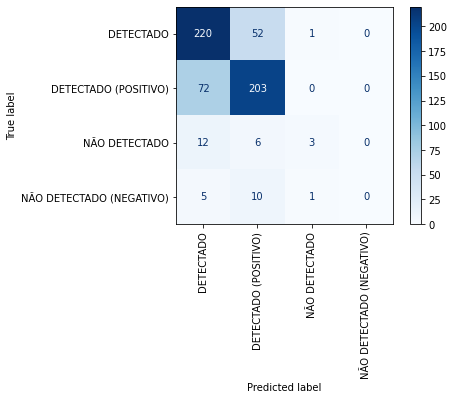

In [17]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

disp = plot_confusion_matrix(clf, x_test, y_test,
                                 display_labels=classes[1],
                                 cmap=plt.cm.Blues,
                                 xticks_rotation='vertical')
plt.show()


In [18]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=classes[1]))


Accuracy: 0.73

Micro Precision: 0.73
Micro Recall: 0.73
Micro F1-score: 0.73

Macro Precision: 0.52
Macro Recall: 0.42
Macro F1-score: 0.43

Weighted Precision: 0.71
Weighted Recall: 0.73
Weighted F1-score: 0.71

Classification Report

                          precision    recall  f1-score   support

               DETECTADO       0.71      0.81      0.76       273
    DETECTADO (POSITIVO)       0.75      0.74      0.74       275
           NÃO DETECTADO       0.60      0.14      0.23        21
NÃO DETECTADO (NEGATIVO)       0.00      0.00      0.00        16

                accuracy                           0.73       585
               macro avg       0.52      0.42      0.43       585
            weighted avg       0.71      0.73      0.71       585



/home/aluno/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aluno/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
